In [1]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install xgboost

In [201]:
# Import required libraries
import os
import pandas as pd
import numpy as np

from numpy import sort

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools

In [8]:
os.chdir("/.../Chapter 7")
os.getcwd()

'/Users/Dippies/CODE PACKT - EML/Chapter 7'

In [28]:
df_glassdata = pd.read_csv('glassdata.csv')
df_glassdata.shape

(214, 11)

In [40]:
df_glassdata.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
# split data into X and y
X = df_glassdata.iloc[:,1:10]
Y = df_glassdata.iloc[:,10]

In [37]:
print(X.shape)
print(Y.shape)

(214, 9)
(214,)


In [38]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [39]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [41]:
df_glassdata.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [44]:
# Create train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [55]:
xg_model = XGBClassifier()
xg_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

** Visualize Individual Trees. num_trees=0 gives you the 1st boosted tree **

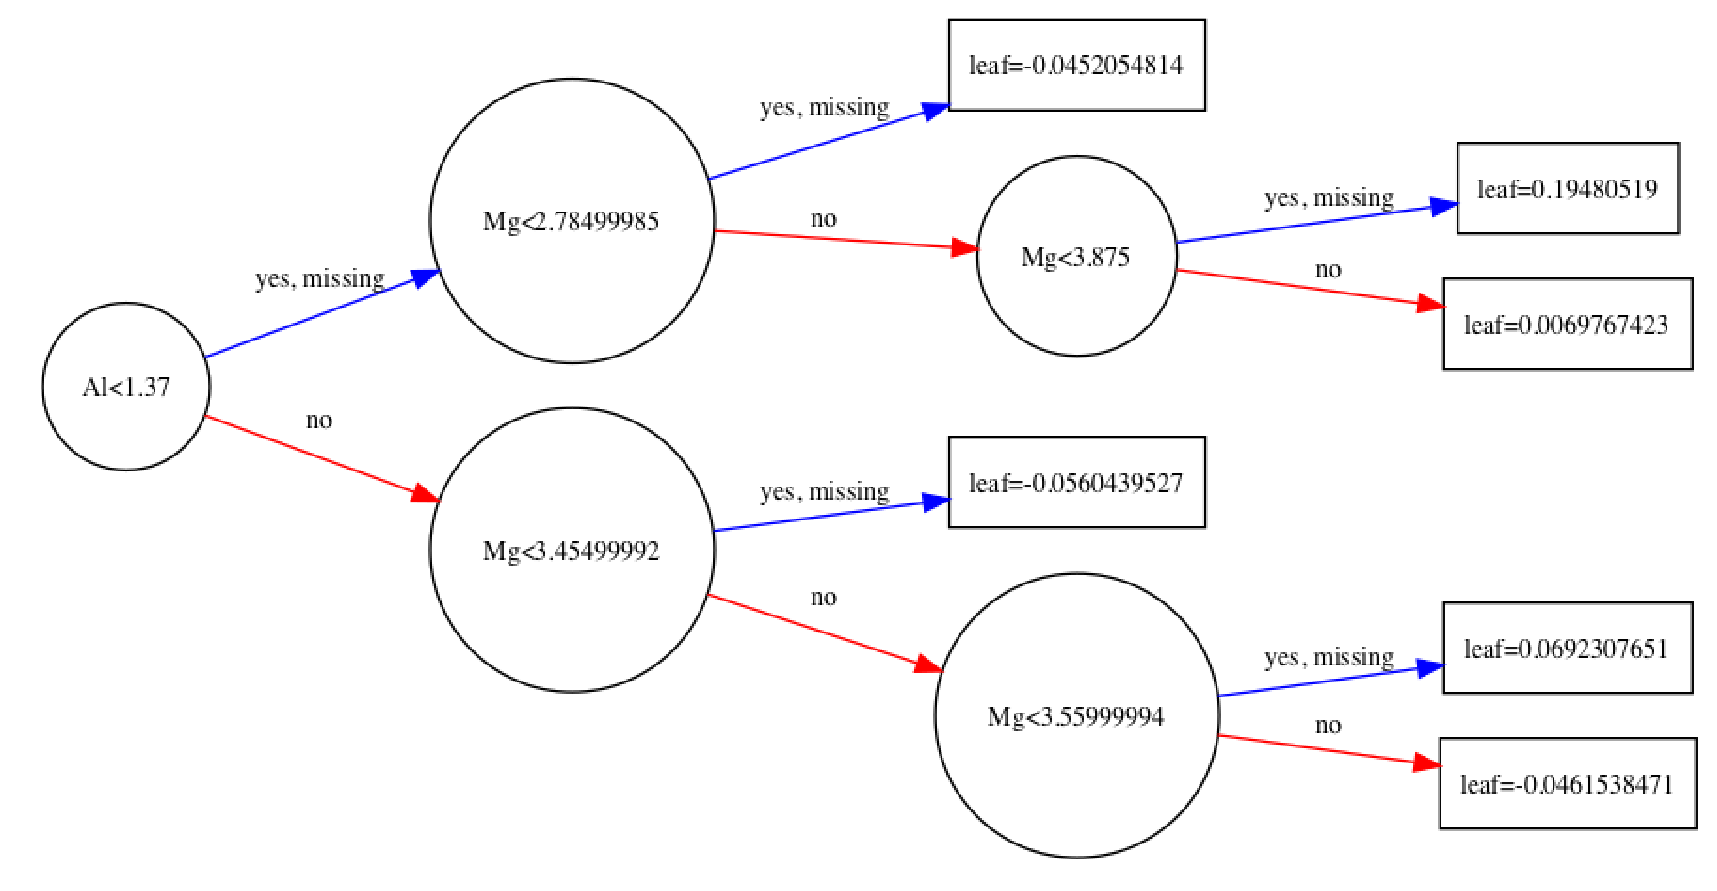

In [223]:
plot_tree(xg_model, num_trees=0, rankdir='LR')
fig = pyplot.gcf()
fig.set_size_inches(30, 30)

** Visualize Individual Trees. num_trees=5 gives you the 4st boosted tree **

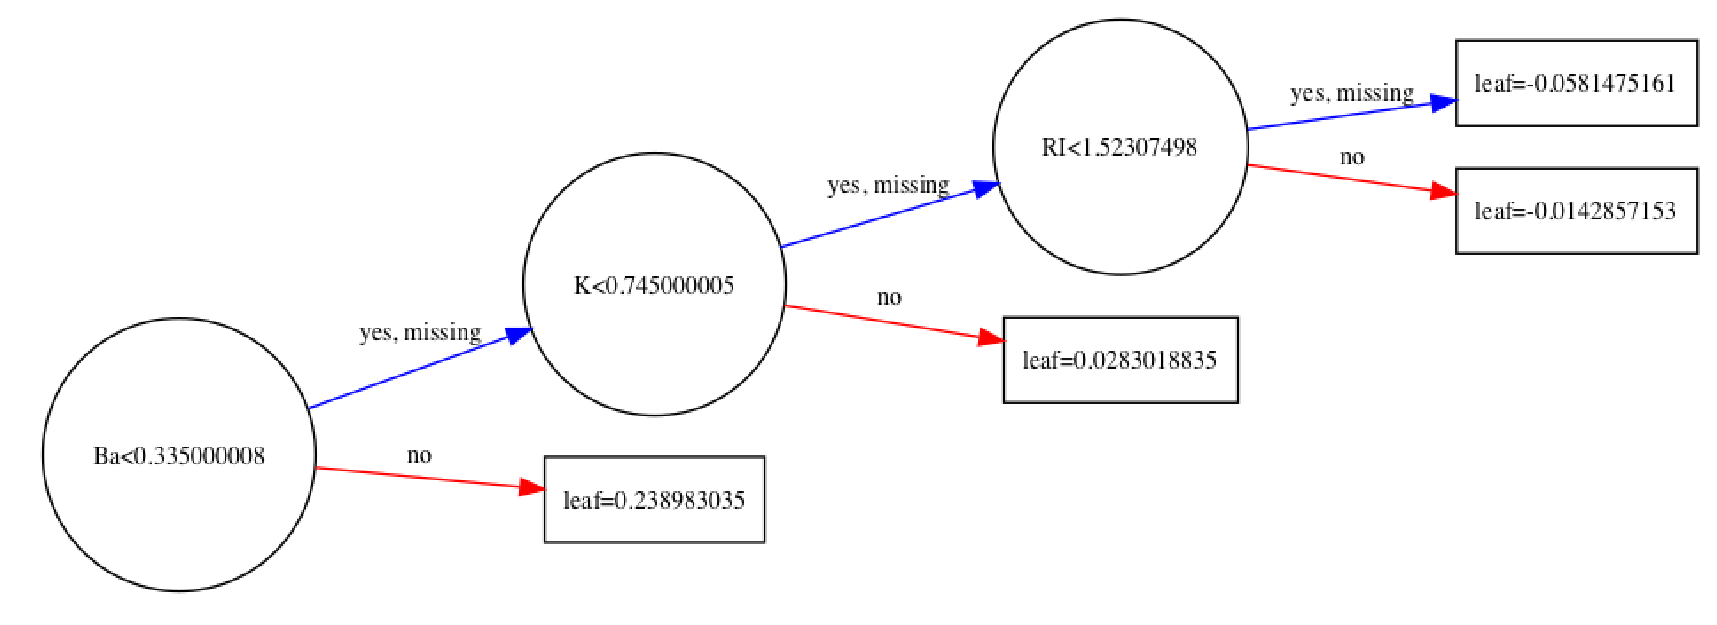

In [114]:
plot_tree(xg_model, num_trees=5, rankdir='LR')
fig = pyplot.gcf()
fig.set_size_inches(30, 30)

In [200]:
test_predictions = xg_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 100.00%
Test Accuracy: 69.23%


** Confusion Matrix **

In [194]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [186]:
confusion_matrix(Y_test, predictions)

array([[13,  3,  3,  1,  1,  0],
       [ 4, 18,  1,  1,  0,  2],
       [ 2,  2,  0,  1,  0,  2],
       [ 0,  1,  1,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0],
       [ 2,  4,  0,  0,  0,  1]])

In [203]:
# We see unique values of our target variable
Y.unique()

array([1, 2, 3, 5, 6, 7])

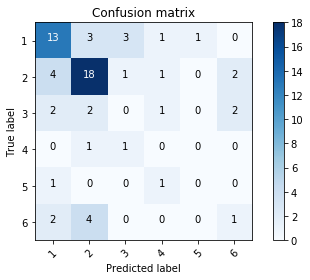

In [195]:
# Set names to each level of our target variable
target_names = [ '1', '2', '3', '5', '6', '7']

#Pass Actual & Predicted values to confusion_matrix()
cm = confusion_matrix(Y_test, predictions)

plt.figure()
plot_confusion_matrix(cm, classes=target_names)
plt.show()

** Visualizing Feature Importance **

In [115]:
print(xg_model.feature_importances_)

[ 0.19668458  0.13037634  0.16801076  0.13261649  0.10035843  0.08826165
  0.12141577  0.04211469  0.02016129]


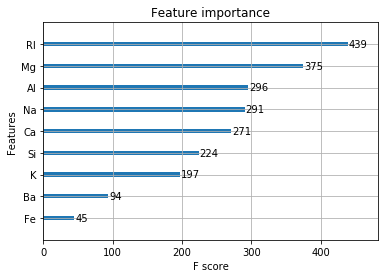

In [134]:
plot_importance(xg_model)

** Feature Selection **

In [199]:
# The threshold value to use for feature selection. 
feature_importance = sort(xg_model.feature_importances_)

# select features using threshold
for each_threshold in feature_importance:
    selection = SelectFromModel(xg_model, threshold=each_threshold, prefit=True)
    
    # Reduce X_train only to the selected feature
    selected_feature_X_train = selection.transform(X_train)
    
    # Train the model
    selection_model = XGBClassifier()
    selection_model.fit(selected_feature_X_train, Y_train)
    
    # Reduce X_test only to the selected feature
    selected_feature_X_test = selection.transform(X_test)
    
    # Predict using the test value of the selected feature
    predictions = selection_model.predict(selected_feature_X_test)
    
    accuracy = accuracy_score(Y_test, predictions)
    print("Threshold=%.5f, Number of Features=%d, Model Accuracy: %.2f%%" % (each_threshold, selected_feature_X_train.shape[1],accuracy*100))

Threshold=0.02016, Number of Features=9, Model Accuracy: 0.69%
Threshold=0.04211, Number of Features=8, Model Accuracy: 0.71%
Threshold=0.08826, Number of Features=7, Model Accuracy: 0.69%
Threshold=0.10036, Number of Features=6, Model Accuracy: 0.68%
Threshold=0.12142, Number of Features=5, Model Accuracy: 0.72%
Threshold=0.13038, Number of Features=4, Model Accuracy: 0.71%
Threshold=0.13262, Number of Features=3, Model Accuracy: 0.66%
Threshold=0.16801, Number of Features=2, Model Accuracy: 0.69%
Threshold=0.19668, Number of Features=1, Model Accuracy: 0.49%


** Evaluating model with K-Fold Cross Validation **

In [216]:
kfold = KFold(n_splits=40, random_state=0)
xg_model_with_kfold = XGBClassifier()

cv_results = cross_val_score(xg_model_with_kfold, X_train, Y_train, cv=kfold, verbose=True)
print("Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_results.mean()*100, cv_results.std()*100))

Mean Accuracy: 77.92%  Standard Deviation 22.33%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.3s finished


** If you have many classes for a classification type predictive modeling problem or the classes are imbalanced (there are a lot more instances for one class than another), it can be a good idea to create stratified folds when performing cross-validation.**

** n_splits=80 cannot be greater than the number of members in each class.**

In [221]:
Stratfold = StratifiedKFold(n_splits=40, random_state=0)
xg_model_with_stratfold = XGBClassifier()

sf_results = cross_val_score(xg_model_with_stratfold, X_train, Y_train, cv=Stratfold, verbose=True)
print("Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (sf_results.mean()*100, sf_results.std()*100))                               

Mean Accuracy: 81.18%  Standard Deviation 21.37%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.3s finished
